| Autor       | Patrick Michel                                           |
|-------------|----------------------------------------------------------|
| 6. Semester | FFHS - Fernfachhochschule Schweiz                        |
| Fach        | AnPy, Analysis mit Python, BSc INF 2017 Pas, BE1-I, FS20 |
| Dozent      | Geuss Markus                                             |

# Inhaltsverzeichnis

* Einführung
* Aufgabenstellung
* Systemanforderungen
* Riemann-Integral
* Sehnentrapezregel
* Tangententrapezregel
* Simpsonsche Regel
* Vermutung & Grenzwert
* Genauigkeit der Approximationen
* Reflexion & Einschätzung
* Verweise

# Einführung

In dieser Arbeit geht es um das numerische Integrieren und somit Bestimmten von Flächen einer Funktion. Dies wird in einem theoretischen Teil beschrieben sowie exemplarisch mit der Programmiersprache Python umgesetzt.

## Aufgabenstellung

1. Beschreiben Sie den Begriff des bestimmten Integrales.
2. Beschreiben Sie die Sekantenzrapezregel, die Tangententrapezregel und die Simpsonsche Regel als Näherungsformel für zur Berechnung bestimmter Integrale.
3. Erstellen Sie drei Python-Funktionen
    * `sekanten_trapez_regel(f, a, b, n)`
    * `tangenten_trapez_regel(f, a, b, n)`
    * `simpson_regel(f, a, b, n)`
    * zur Approximation des Integrals 
\begin{equation}
    \int_{a}^{b} f(x)\, dx
\end{equation}
    * dabei steht n für die Anzahl Streifen (bzw Doppelstreifrn bei Simpson) in den Approximationen.
4. Verwenden Sie die drei Approximationsregeln zur Bestimmung der folgenden Integrale (Varieren Sie dabei die Anzahl Streifen n):  
    
\begin{equation}
    \int_{0}^{\pi} sin(x)\, dx
\end{equation}
    
\begin{equation}
    \int_{-1}^{1} \sqrt{1 - x^{2}}\, dx
\end{equation}
    
\begin{equation}
    \int_{0}^{1} x^{2}\, dx
\end{equation}
5. Stellen Sie Vermutungen auf, was beim Grenzwert n→∞ passiert.
6. Überprüfen Sie Ihre Vermutungen mit Sympy.
7. Vergleichen Sie die Genauigkeit der gemachten Approximationen.

## Systemanforderungen

Folgende Voraussetzungen muss die Jupyter Umgebung erfüllen um alle nachfolgenden Codebeispiele ausführen zu können.

* Python 3.7.x 
* Pip Packages
    * Matplotlib
    * Numpy
    * SciPy
    
Um nachfolgend die Übersicht zu wahren wurden alle nötigen imports in die erste Sektion geholt. Für eine einfachere Handhabung wird der importierte pyplot der alias *plt* vergeben.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Riemann-Integral

Das Riemann Integral ist eine mathematische Methode zur Veranschaulichung des Flächeninhaltes zwischen dem Abschnitt einer x-Achse und dem Graphen einer Funktion.

![Riemann_Integral](img/riemann_integral.png)

Das Grundprinzip beruht auf dem Prinzip der Annäherung. Es wird zuerst ein Bereich auf der x-Achse den es zu integrieren gibt definiert. Im obigen Beispiel ist dieser Bereich von a -> b. Danach werden n Punkte welche in einem gleichen Abstand auf dem Funktionsverlauf liegen genommen und aus diesen dann gleich grosse Rechtecke erstellt. Daraus ergibt sich nun eine mehr oder weniger genau Abdeckung der Fläche dieser Funktion. Um die Fläche nun zu bestimmen kann man die Flächen der einzelnen Rechtecke summieren. Je grösser nun n wird also je kleiner die einzelnen Rechtecke werden desto genauer wird das Resultat in Bezug auf die tatsächliche Fläche. Wenn mann n nun an ∞ also den Grenzwert annähert kommt schlussendlich der exakte Wert der Fläche heraus. Doch je grösser n ist desto aufwändiger wird natürlich auch die Berechnung für den Computer. Ein Integral von hand zu bestimmen und berechnen ist theoretisch möglich doch macht durch den schnell wachsenden Aufwand keinen Sinn. Daher kann man das gut den Computern überlassen.

## Sehnentrapezregel

Bei der Sehnentrapezregel wir die Annäherung durch durch Trapeze umgesetzt.

![Sehnen_Trapez_1](img/sehnentrapez_1.png)

Der Flächeninhalt des Sehnentrapezes kann durch folgende Formel bestimmt werden:

\begin{equation}
    ST_{1} = (b-a) * \frac{f(a) + f(b)}{2}
\end{equation}

Um nun die Fläche genauer zu bestimmen wird wie beim Riemann Integral der Bereich von a -> b in n Sehnentrapeze aufgeteilt. Um dann die gesamte Fläche zu bestimmen, wird wieder die Fläche jedes einzelnen Sehnentrapezes gerechnet und dann daraus die Summe gebildet. Dies kann je nach Funktion schon eine sehr gute Näherung im Vergleich zu Rechtecken bringen. Nachfolgend nun die allgemeine Sehnentrapezformel:

\begin{equation}
    A = \frac{b-a}{n}  * (\frac{f(x_{0})}{2} + f(x_{1}) + f(x_{0})\;+\;...\;+\;\frac{f(x_{n})}{2})
\end{equation}

Nun folgt die Implementierung dieser Formel in Python.

In [30]:
def sekanten_trapez_regel(f, a, b, n):
    A = 0
    steps = (b - a) / n
    for i in range(0, n + 1):
        if i == 0 or i == n:
            A += f(a + i * steps) / 2
            pass
        else:
            A += f(a + i * steps)
            pass
        pass
    return A * steps

Exakter Wert: 1.5707963267948966
n = 10: 1.5185244144417753, Genauigkeit: 96.672%
n = 100: 1.5691342555492498, Genauigkeit: 99.894%
n = 1000: 1.570743738501071, Genauigkeit: 99.997%


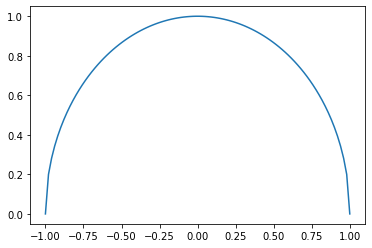

In [49]:
# Dies ist nun ein Beispiel der oben definierten Funktion
# Als Beispiel nehmen wir einen halben Kreis da diese Fläche
# auch ganz genau durch eine einfachere Formel bestimmt werden kann
# was eine einfache Vergleichbarkeit ermöglicht

point = lambda x: np.sqrt(-x**2 + r**2)
x = np.linspace(-r, r, 100)
y = [point(p) for p in x]

A_exact = (r**2 * np.pi) / 2
print('Exakter Wert: ' + str(A_exact))

def accuracy_attempt(n):
    A = sekanten_trapez_regel(py, -r, r, n)
    print(f'n = {n}: {A}, Genauigkeit: {round(A / A_exact * 100, 3)}%')
    pass

# n = 10
accuracy_attempt(10)
# n = 100
accuracy_attempt(100)
# n = 1000
accuracy_attempt(1000)

plt.plot(x, y)
plt.show()

## Reflexion & Einschätzung

Wie oben gezeigt bieten die vorgestellten Pakete oder Bibliotheken extrem viele Möglichkeiten Daten zu visualisieren. Nicht alle Darstellungsformen machen für alle Daten Sinn daher ist es wichtig die Darstellungsform immer auf die Daten und die daraus zu gewinnenden Daten abzustimmen. Matplotlib ist in Kombination mit Numpy extrem effizient und sehr einfach zu handhaben. Meiner persönlichen Meinung dienen diese Pakete in Kombination als eine Alternative für die Programmiersprache R welche sehr ähnliche Möglichkeiten bietet. Auch ist es sehr wertvoll bestimmte Themen noch einmal programmatisch zu visualisieren. Dazu zählen auch die Laufzeitklassen welche durch das in einem oberen Kapitel erstellten Diagramm extrem gut sichtbar gemacht werden konnten. Auch bietet die Programmiersprache Python sehr viele sprachliche Besonderheiten welche es extrem einfach machen mit Listen zu arbeiten. Die Standarddarstellung der Graphen ist nicht immer extrem aussagekräftig. Daher ist es eigentlich immer nötig diese den eigenen Bedürfnissen anzupassen. Dazu gehört das Anpassen der Farben oder auch das Sortieren der Daten damit sie schlussendlich mehr Sinn ergeben.

‎

‎

‎

‎

‎

‎

## Verweise

https://de.wikipedia.org/wiki/Riemannsches_Integral

https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/

https://de.wikipedia.org/wiki/Trapezregel

https://www.mathe-seite.de/oberstufe/analysis-tiefere-einblicke/naehrungsverfahren/trapezregel/

* [1]: [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
* [2]: [https://pythonbasics.org/matplotlib-line-chart/](https://pythonbasics.org/matplotlib-line-chart/)
* [3]: [https://de.wikipedia.org/wiki/Landau-Symbole](https://de.wikipedia.org/wiki/Landau-Symbole)
* [4]: [https://bodo-schoenfeld.de/jupyter-notebook-balkendiagramm-erstellen/](https://bodo-schoenfeld.de/jupyter-notebook-balkendiagramm-erstellen/)
* [5]: Findeisen, P. Die Charakterisierung der Normalverteilung nach Gauß. Metrika 29, 55–63 (1982). [https://doi.org/10.1007/BF01893364](https://doi.org/10.1007/BF01893364)
* [6]: [https://www.parkmycloud.com/blog/aws-vs-azure-vs-google-cloud-market-share/](https://www.parkmycloud.com/blog/aws-vs-azure-vs-google-cloud-market-share/)